In [28]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append("/Users/jenniferskerker/Documents/GradSchool/Research/Equity/Model/Santa_Cruz_WRM_updated/scripts/Plots")
import processing_functions as pf
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

# function to add desal plan, deploy, and ramp down lines to time series plot
def add_desal_labels(ax, y_min, y_max, df_time_tracker):
    lw = 1.8
    for i in range(len(df_time_tracker)):
        if i==0:
            ax.plot([df_time_tracker['plan_date'].iloc[i], df_time_tracker['plan_date'].iloc[i]], [y_min, y_max], color='gray', linestyle=':', linewidth=lw) # , label='plan date'
            ax.plot([df_time_tracker['deploy_date'].iloc[i], df_time_tracker['deploy_date'].iloc[i]], [y_min, y_max], color='gray', linestyle=':', linewidth=lw) # , label='deploy date'
            ax.plot([df_time_tracker['ramp_down_date'].iloc[i], df_time_tracker['ramp_down_date'].iloc[i]], [y_min, y_max], color='gray', linestyle=':', linewidth=lw) # , label='ramp down date'
        else:
            ax.plot([df_time_tracker['plan_date'].iloc[i], df_time_tracker['plan_date'].iloc[i]], [y_min, y_max], color='darkgray', linestyle=':')
            ax.plot([df_time_tracker['deploy_date'].iloc[i], df_time_tracker['deploy_date'].iloc[i]], [y_min, y_max], color='gray', linestyle=':')
            ax.plot([df_time_tracker['ramp_down_date'].iloc[i], df_time_tracker['ramp_down_date'].iloc[i]], [y_min, y_max], color='black', linestyle=':')
        ax.axvspan(df_time_tracker['deploy_date'].iloc[i], df_time_tracker['ramp_down_date'].iloc[i], alpha=0.3, color='lightgray')
    ax.set_ylim(y_min, y_max)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# import data for one simulation
# import cashflow data - none/baseline
#filepath =
real = 4373
dT = 1
dP = 80
dCV = 1.0
demand = 'Baseline'
name_add = ''
df_cashflow = pd.read_csv(filepath + 'df_cashflow_{}P{}T{}_dCV{}_real{}_demand{}.csv'.format(name_add, dP, dT, dCV, real, demand))
df_cashflow['Date'] = pd.to_datetime(df_cashflow['Date'])
df_cashflow.set_index("Date", inplace=True)
df_cashflow
#print(df_cashflow)
num_tiers = sum(col.startswith("demand_") for col in df_cashflow.columns)
#print(num_tiers)

# import time tracker
df_time_tracker = pd.read_csv(filepath + 'df_time_tracker_{}P{}T{}_dCV{}_real{}_demand{}.csv'.format(name_add, dP, dT, dCV, real, demand))
df_time_tracker['plan_date'] = pd.to_datetime(df_time_tracker['plan_date'])
df_time_tracker['deploy_date'] = pd.to_datetime(df_time_tracker['deploy_date'])
df_time_tracker['ramp_down_date'] = pd.to_datetime(df_time_tracker['ramp_down_date'])
print(df_time_tracker)

# get annual aggregation
df_annual = df_cashflow.resample("YE").mean()

   Unnamed: 0   inf_option  desal_mgd  plan_date deploy_date  \
0           0  DESALT_4MGD          0 2029-10-01  2039-10-01   

          payback_date ramp_down_date  capex_cost  opex_cost_annual  
0  2059-10-01 00:00:00     2069-10-01   212445600           9953160  


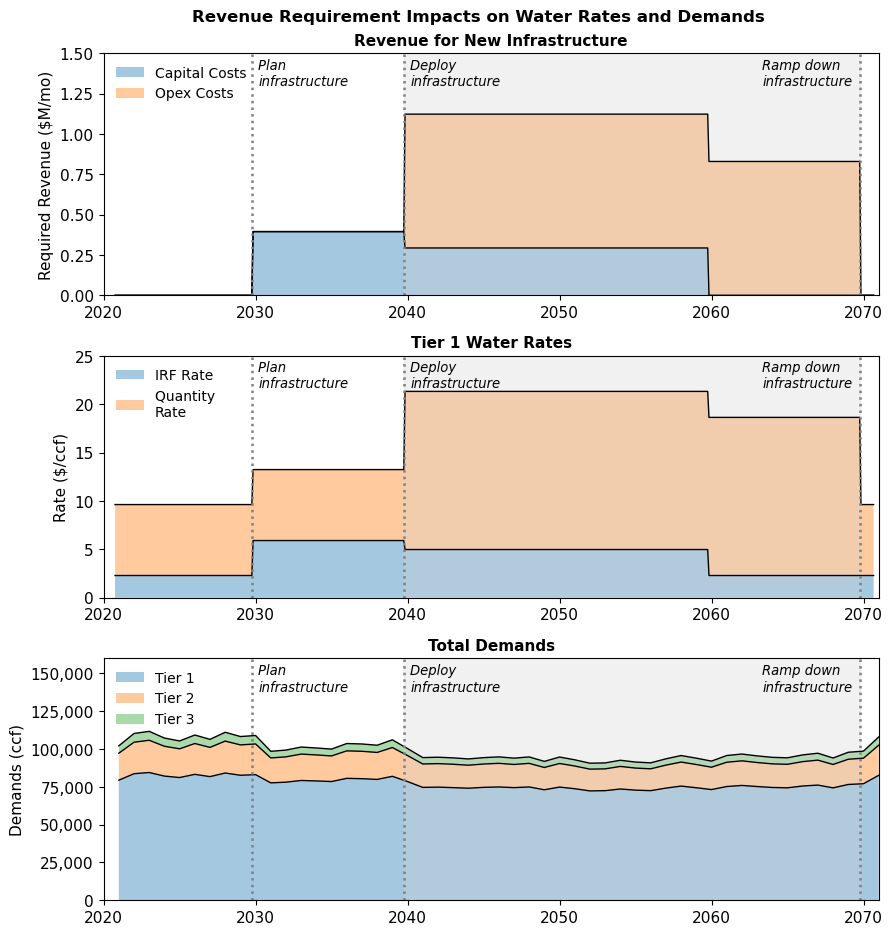

In [44]:
### create time series figure- v1  ###
start = pd.to_datetime("2020-01-01")
end   = pd.to_datetime("2070-12-31")
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 11))
plt.subplots_adjust(hspace=0.25)

# set plotting parameters
alpha=0.4
lw = 1.0


# subplot 1: IRF and opex revenue needed
df_cashflow['total_revenue'] = df_cashflow['IRF_revenue_needed'] + df_cashflow['Opex_monthly_dollars']
axes[0].plot(df_cashflow['IRF_revenue_needed']/1e6, color='black', linewidth=lw)
#axes[0].plot(df_cashflow['Opex_monthly_dollars']/1e6, linestyle='--', label='Opex Revenue')
axes[0].plot((df_cashflow['IRF_revenue_needed'] + df_cashflow['Opex_monthly_dollars'])/1e6, color='black', linewidth=lw)
axes[0].fill_between(df_cashflow.index, np.zeros(len(df_cashflow)), df_cashflow['IRF_revenue_needed']/1e6, alpha=alpha, label='Capital Costs')
axes[0].fill_between(df_cashflow.index, df_cashflow['IRF_revenue_needed']/1e6, df_cashflow['total_revenue']/1e6, alpha=alpha, label='Opex Costs')
add_desal_labels(axes[0], 0, 1.5, df_time_tracker)
axes[0].set_ylabel('Required Revenue ($M/mo)', fontsize=11)
axes[0].set_xlim(start, end)
axes[0].xaxis.set_major_locator(mdates.YearLocator(10)) # Tick every 10 years
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Show only the year
axes[0].tick_params(axis='x', labelsize=11) # Optional: adjust label size / rotation
axes[0].set_yticks([0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5])
axes[0].tick_params(axis='y', labelsize=11)
axes[0].legend(fontsize=10, loc='upper left', frameon=False)
axes[0].set_title('Revenue for New Infrastructure', fontsize=11, fontweight='bold')

# add labels
y = 1.3
ft = 9.5
axes[0].text(pd.to_datetime("2030-03-01"), y, 'Plan \ninfrastructure', fontsize=ft, fontstyle='italic')
axes[0].text(pd.to_datetime("2040-03-01"), y, 'Deploy \ninfrastructure', fontsize=ft, fontstyle='italic')
axes[0].text(pd.to_datetime("2063-05-01"), y, 'Ramp down \ninfrastructure', fontsize=ft, fontstyle='italic')

# subplot 2: rates
#axes[1].plot(df_cashflow['Quant_T1_upd'], color='black')
axes[1].plot(df_cashflow['IRF_T1_upd'], color='black', linewidth=lw)
axes[1].plot(df_cashflow['Quant_T1_upd'] + df_cashflow['IRF_T1_upd'], color='black', linewidth=lw)
axes[1].fill_between(df_cashflow.index, np.zeros(len(df_cashflow)), df_cashflow['IRF_T1_upd'], alpha=alpha, label='IRF Rate')
axes[1].fill_between(df_cashflow.index, df_cashflow['IRF_T1_upd'], df_cashflow['Quant_T1_upd'] + df_cashflow['IRF_T1_upd'], alpha=alpha, label='Quantity \nRate')
add_desal_labels(axes[1], 0, 25, df_time_tracker)
axes[1].set_ylabel('Rate ($/ccf)', fontsize=11)
axes[1].legend(fontsize=10, loc='upper left', frameon=False)
axes[1].set_xlim(start, end)
axes[1].xaxis.set_major_locator(mdates.YearLocator(10)) # Tick every 10 years
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Show only the year
axes[1].tick_params(axis='x', labelsize=11) # Optional: adjust label size / rotation
axes[1].set_yticks([0, 5, 10, 15, 20, 25])
axes[1].tick_params(axis='y', labelsize=11)
axes[1].set_title('Tier 1 Water Rates', fontsize=11, fontweight='bold')

# add labels
y = 21.7
axes[1].text(pd.to_datetime("2030-03-01"), y, 'Plan \ninfrastructure', fontsize=ft, fontstyle='italic')
axes[1].text(pd.to_datetime("2040-03-01"), y, 'Deploy \ninfrastructure', fontsize=ft, fontstyle='italic')
axes[1].text(pd.to_datetime("2063-05-01"), y, 'Ramp down \ninfrastructure', fontsize=ft, fontstyle='italic')

# subplot 3: Tier 1 Demands
axes[2].plot(df_annual['demand_t1'], color='black', linewidth=lw)
axes[2].plot(df_annual['demand_t1']+df_annual['demand_t2'], color='black', linewidth=lw)
axes[2].plot(df_annual['demand_t1']+df_annual['demand_t2']+df_annual['demand_t3'], color='black', linewidth=lw)
axes[2].fill_between(df_annual.index, np.zeros(len(df_annual)), df_annual['demand_t1'], alpha=alpha, label='Tier 1')
axes[2].fill_between(df_annual.index, df_annual['demand_t1'], df_annual['demand_t1']+df_annual['demand_t2'], alpha=alpha, label='Tier 2')
axes[2].fill_between(df_annual.index, df_annual['demand_t1']+df_annual['demand_t2'], df_annual['demand_t1']+df_annual['demand_t2']+df_annual['demand_t3'], alpha=alpha, label='Tier 3')
add_desal_labels(axes[2], 0, 1.6e5, df_time_tracker)
axes[2].set_ylabel('Demands (ccf)', fontsize=11)
axes[2].set_xlim(start, end)
axes[2].xaxis.set_major_locator(mdates.YearLocator(10)) # Tick every 10 years
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Show only the year
axes[2].tick_params(axis='x', labelsize=11) # Optional: adjust label size / rotation
axes[2].set_yticks([0, 25000, 50000, 75000, 100000, 125000, 150000])
axes[2].yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
axes[2].tick_params(axis='y', labelsize=11)
axes[2].legend(fontsize=10, loc='upper left', frameon=False)
axes[2].set_title('Total Demands', fontsize=11, fontweight='bold')

# add labels
y = 138500
axes[2].text(pd.to_datetime("2030-03-01"), y, 'Plan \ninfrastructure', fontsize=ft, fontstyle='italic')
axes[2].text(pd.to_datetime("2040-03-01"), y, 'Deploy \ninfrastructure', fontsize=ft, fontstyle='italic')
axes[2].text(pd.to_datetime("2063-05-01"), y, 'Ramp down \ninfrastructure', fontsize=ft, fontstyle='italic')


plt.suptitle('Revenue Requirement Impacts on Water Rates and Demands', fontsize=12, fontweight='bold', y=0.92)
plt.savefig(
    '../../../outputs//SA_Timeseries_Revenue_Rates_Demands.png', bbox_inches='tight', dpi=300)
plt.show()